In [1]:
import pandas as pd
from pathlib import Path

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/test.csv.zip
/kaggle/input/train.csv.zip
/kaggle/input/description.md
/kaggle/input/sample_submission.csv
/kaggle/input/train.csv
/kaggle/input/test.csv
/kaggle/input/sample_submission.csv.zip
/kaggle/input/tabular-playground-series-may-2022/test.csv.zip
/kaggle/input/tabular-playground-series-may-2022/train.csv.zip
/kaggle/input/tabular-playground-series-may-2022/description.md
/kaggle/input/tabular-playground-series-may-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-may-2022/train.csv
/kaggle/input/tabular-playground-series-may-2022/test.csv
/kaggle/input/tabular-playground-series-may-2022/sample_submission.csv.zip


In [3]:
train_df = pd.read_csv('/kaggle/input/tabular-playground-series-may-2022/train.csv')
test_df = pd.read_csv('/kaggle/input/tabular-playground-series-may-2022/test.csv')


In [4]:
train_df.count(), train_df.dtypes


(id        800000
 f_00      800000
 f_01      800000
 f_02      800000
 f_03      800000
 f_04      800000
 f_05      800000
 f_06      800000
 f_07      800000
 f_08      800000
 f_09      800000
 f_10      800000
 f_11      800000
 f_12      800000
 f_13      800000
 f_14      800000
 f_15      800000
 f_16      800000
 f_17      800000
 f_18      800000
 f_19      800000
 f_20      800000
 f_21      800000
 f_22      800000
 f_23      800000
 f_24      800000
 f_25      800000
 f_26      800000
 f_27      800000
 f_28      800000
 f_29      800000
 f_30      800000
 target    800000
 dtype: int64,
 id          int64
 f_00      float64
 f_01      float64
 f_02      float64
 f_03      float64
 f_04      float64
 f_05      float64
 f_06      float64
 f_07        int64
 f_08        int64
 f_09        int64
 f_10        int64
 f_11        int64
 f_12        int64
 f_13        int64
 f_14        int64
 f_15        int64
 f_16        int64
 f_17        int64
 f_18        int64
 f_19      

In [5]:
train_df.target.value_counts()


target
0    411088
1    388912
Name: count, dtype: int64

In [6]:
fs = [f'f_{i:02d}' for i in range(0, 31)]
num_df = train_df[['target']+fs].drop(['f_27'], axis=1)


In [7]:
num_df.corr()


,target,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30
target,1.000000,0.055189,0.055742,0.031920,-0.000059,-0.000427,0.032875,-0.001214,0.005391,0.035752,...,-0.036281,0.130933,0.065999,0.081501,0.086209,-0.032369,0.058817,0.035843,0.051399,0.020733
f_00,0.055189,1.000000,-0.000215,0.001941,-0.000757,-0.000856,0.000641,-0.001953,0.001196,-0.002051,...,-0.000154,0.000878,-0.001243,0.000048,0.001587,0.000491,-0.000486,0.189038,0.000233,-0.001157
f_01,0.055742,-0.000215,1.000000,0.000852,-0.001324,-0.000891,0.000188,-0.000187,-0.001167,0.000016,...,0.000906,-0.001513,-0.000374,-0.000748,-0.001347,-0.000292,0.001950,0.193299,-0.000135,-0.000817
f_02,0.031920,0.001941,0.000852,1.000000,0.001078,0.000192,-0.001559,0.000155,0.001176,0.000708,...,0.001563,-0.000268,-0.000129,-0.000688,0.000031,-0.000925,0.000292,0.209134,-0.001387,0.000998
f_03,-0.000059,-0.000757,-0.001324,0.001078,1.000000,0.001074,0.002801,-0.000940,0.000796,0.000363,...,0.000444,-0.000446,0.000732,0.001361,0.003200,0.001799,0.000362,0.329022,-0.000662,-0.000040
f_04,-0.000427,-0.000856,-0.000891,0.000192,0.001074,1.000000,-0.000348,-0.001240,0.000563,-0.000244,...,0.000217,-0.000225,0.002193,-0.002803,0.000154,-0.002063,-0.000693,0.169960,-0.001359,0.000484
f_05,0.032875,0.000641,0.000188,-0.001559,0.002801,-0.000348,1.000000,0.000692,0.000688,-0.000666,...,0.000154,0.000616,0.001228,-0.000630,-0.001098,0.001782,0.001134,0.295802,-0.001830,-0.000580
f_06,-0.001214,-0.001953,-0.000187,0.000155,-0.000940,-0.001240,0.000692,1.000000,-0.001035,-0.000788,...,-0.000723,-0.000340,0.000119,0.000266,-0.001563,0.000829,-0.000407,0.164399,0.000624,0.000441
f_07,0.005391,0.001196,-0.001167,0.001176,0.000796,0.000563,0.000688,-0.001035,1.000000,0.113072,...,-0.003593,0.000402,-0.000435,0.003930,0.001962,-0.000398,-0.004162,0.001032,-0.048005,0.000393
f_08,0.035752,-0.002051,0.000016,0.000708,0.000363,-0.000244,-0.000666,-0.000788,0.113072,1.000000,...,-0.004173,0.004109,-0.002170,0.002842,0.003793,-0.001646,-0.002697,0.000980,0.064836,0.000800


In [8]:
display(train_df['f_27'])
print('% of unique sequence in train', len(train_df['f_27'].unique()) / len(train_df['f_27']))
print('% of unique sequence in test', len(test_df['f_27'].unique()) / len(test_df['f_27']))


0         ACBADABECB
1         BBBCAAAFDE
2         BDAEAABICD
3         BAABFADDCA
4         AABFBBEMHC
             ...    
799995    ACBCBBDAAB
799996    BDBBBBDSEA
799997    BBBECADQCC
799998    AGBBAABBDE
799999    BBBBAAAGBC
Name: f_27, Length: 800000, dtype: object

% of unique sequence in train 0.83864875
% of unique sequence in test 0.9748


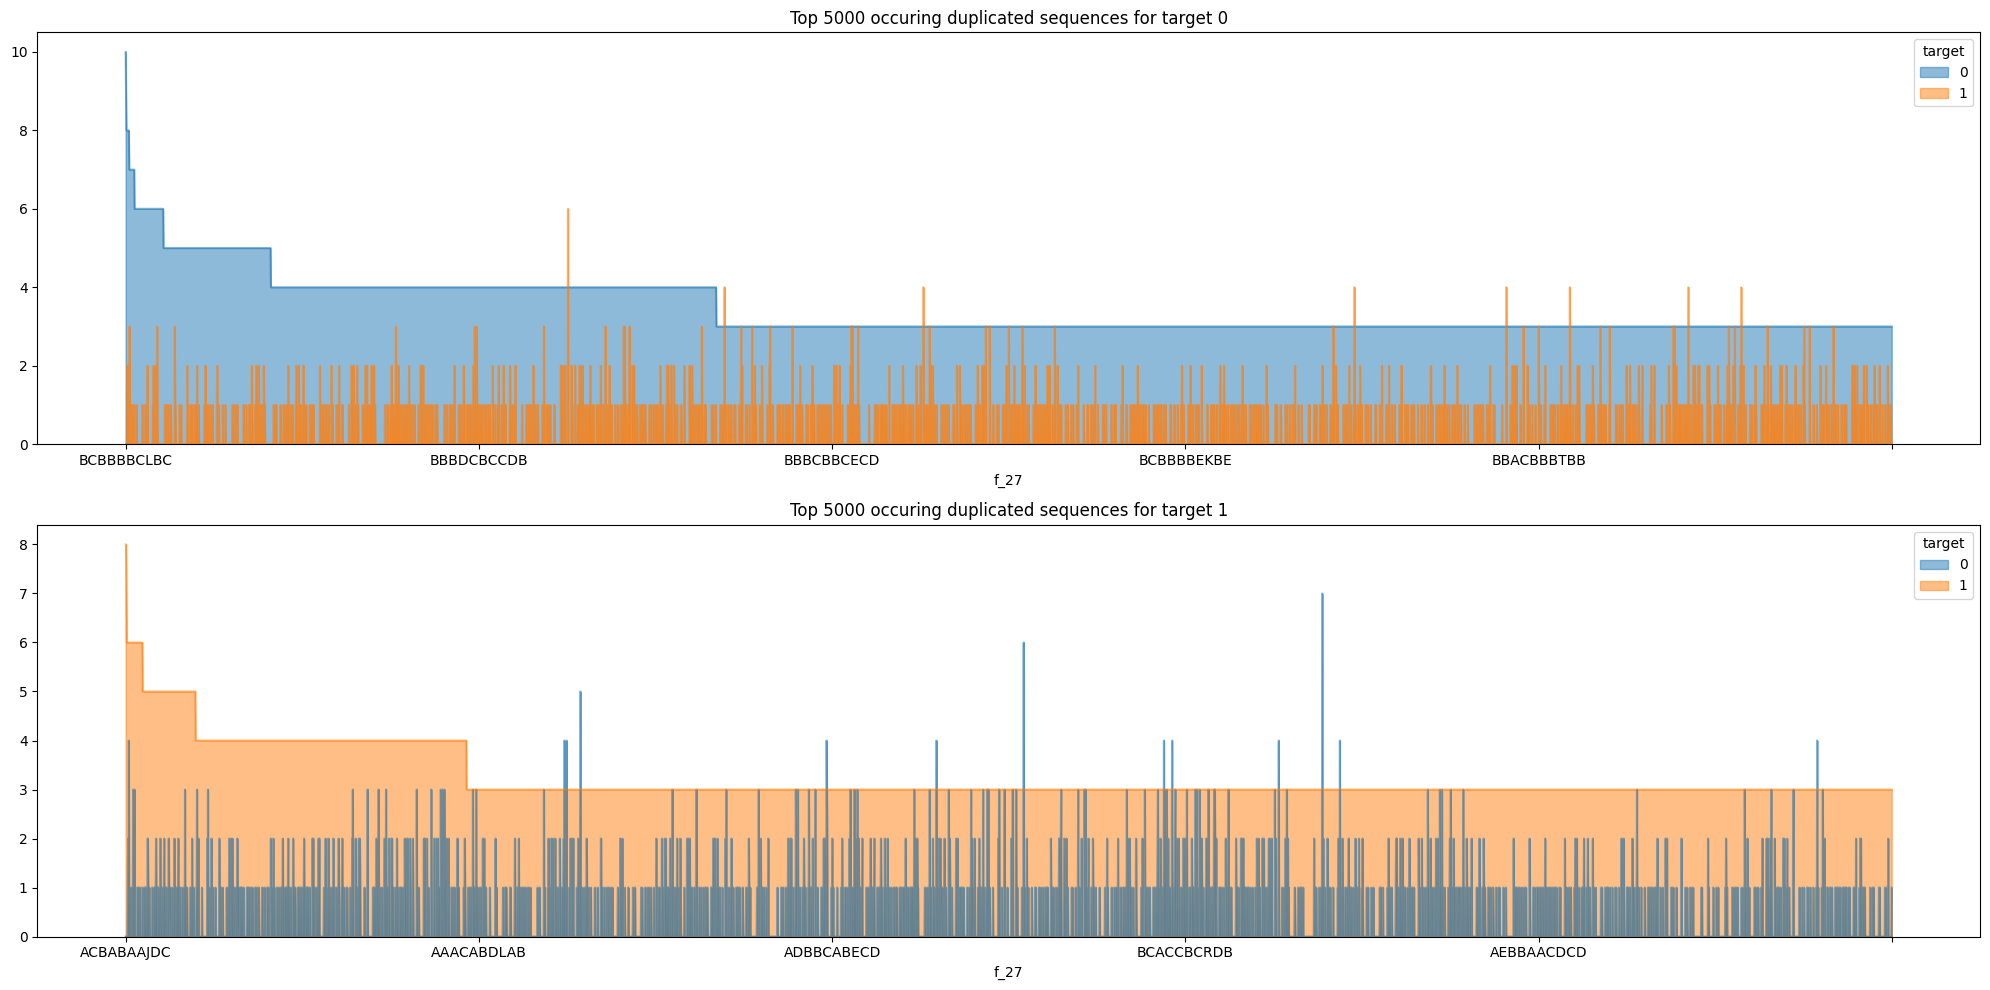

In [9]:
f27_target_seq_counts = train_df[['target', 'f_27']].groupby(['target', 'f_27']).size().unstack(fill_value=0).T

most_occur_in_0 = f27_target_seq_counts.sort_values(by=[0], ascending=False)
most_occur_in_1 = f27_target_seq_counts.sort_values(by=[1], ascending=False)

fig, axs = plt.subplots(2, figsize=(20,10))
most_occur_in_0.head(5000).plot(kind='area', stacked=False, ax=axs[0], title='Top 5000 occuring duplicated sequences for target 0')
most_occur_in_1.head(5000).plot(kind='area', stacked=False, ax=axs[1], title='Top 5000 occuring duplicated sequences for target 1')
fig.tight_layout()


In [10]:
f27_map = most_occur_in_0.reset_index()
f27_map.columns = ['f_27', 'f_27_tar0', 'f_27_tar1']
f27_map


,f_27,f_27_tar0,f_27_tar1
0,BCBBBBCLBC,10,0
1,BCBCAABKBB,9,0
2,ABADCACOAA,8,0
3,BBBCBBBDCB,8,0
4,BBBBBBCJBC,8,2
...,...,...,...
670914,AEBBDBCKFD,0,1
670915,AEBBDBCKAA,0,1
670916,AEBBDBCJFB,0,1
670917,AEBBDBCJBC,0,1


In [11]:
print('Among all sequences in test set')
print('% of same duplicated sequence as in train set:', test_df['f_27'].isin(f27_target_seq_counts.index).sum() / len(test_df))
print('# of same top 100 duplicated sequence as in train set, for target 0:',test_df['f_27'].isin(most_occur_in_0.index).sum())
print('# of same top 100 duplicated sequence as in train set, for target 1:', test_df['f_27'].isin(most_occur_in_1.index).sum())


Among all sequences in test set
% of same duplicated sequence as in train set: 0.28435
# of same top 100 duplicated sequence as in train set, for target 0: 28435
# of same top 100 duplicated sequence as in train set, for target 1: 28435


In [12]:
# Splitting the sequences into single letters
f27_split = train_df['f_27'].str.split(pat ="\s*", expand = True).iloc[:,1:-1]
f27_split_test = test_df['f_27'].str.split(pat ="\s*", expand = True).iloc[:,1:-1]


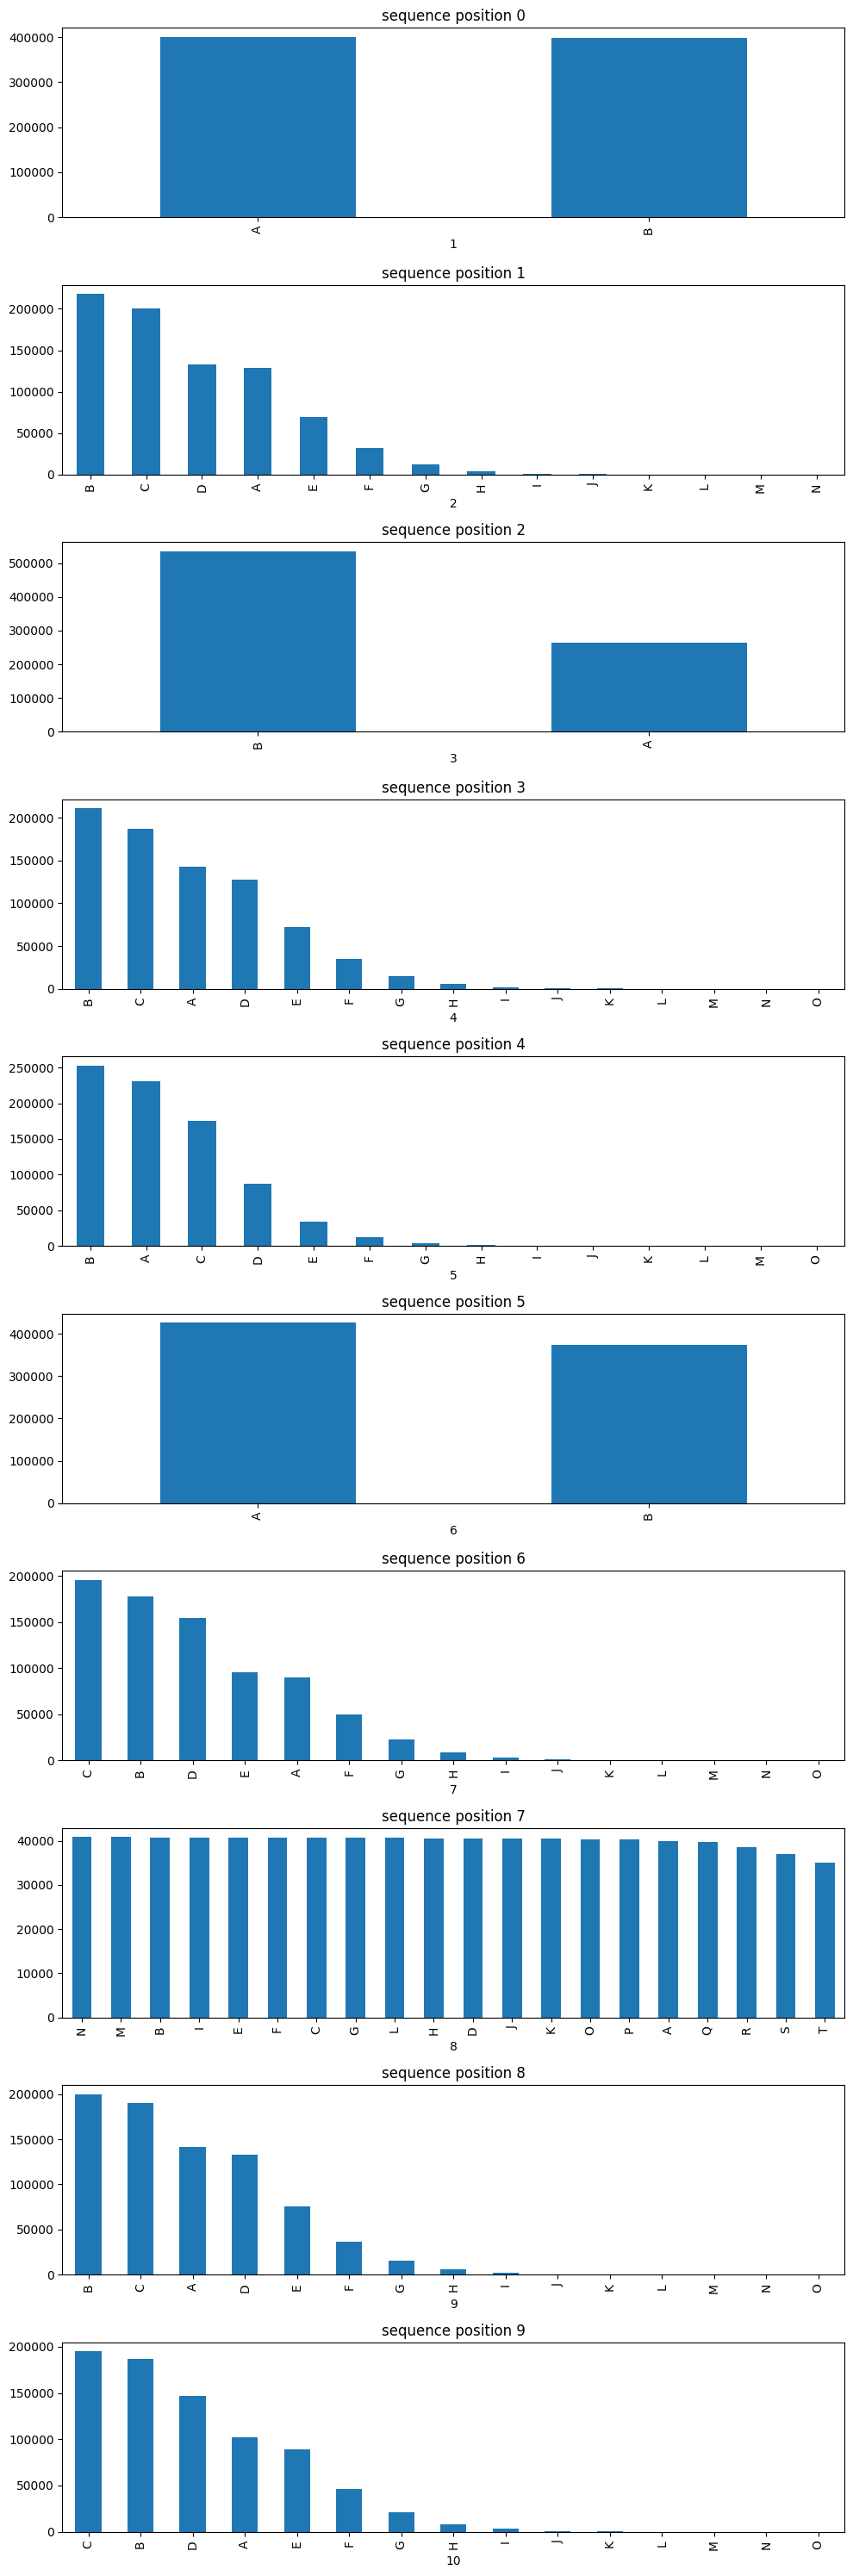

In [13]:
fig, axs = plt.subplots(10, figsize=(10,30))
for i in range(10):
    f27_split.iloc[:, i].value_counts().plot(kind='bar', ax=axs[i], title=f'sequence position {i}')
fig.tight_layout()


In [14]:
f27_split['target'] = train_df['target']


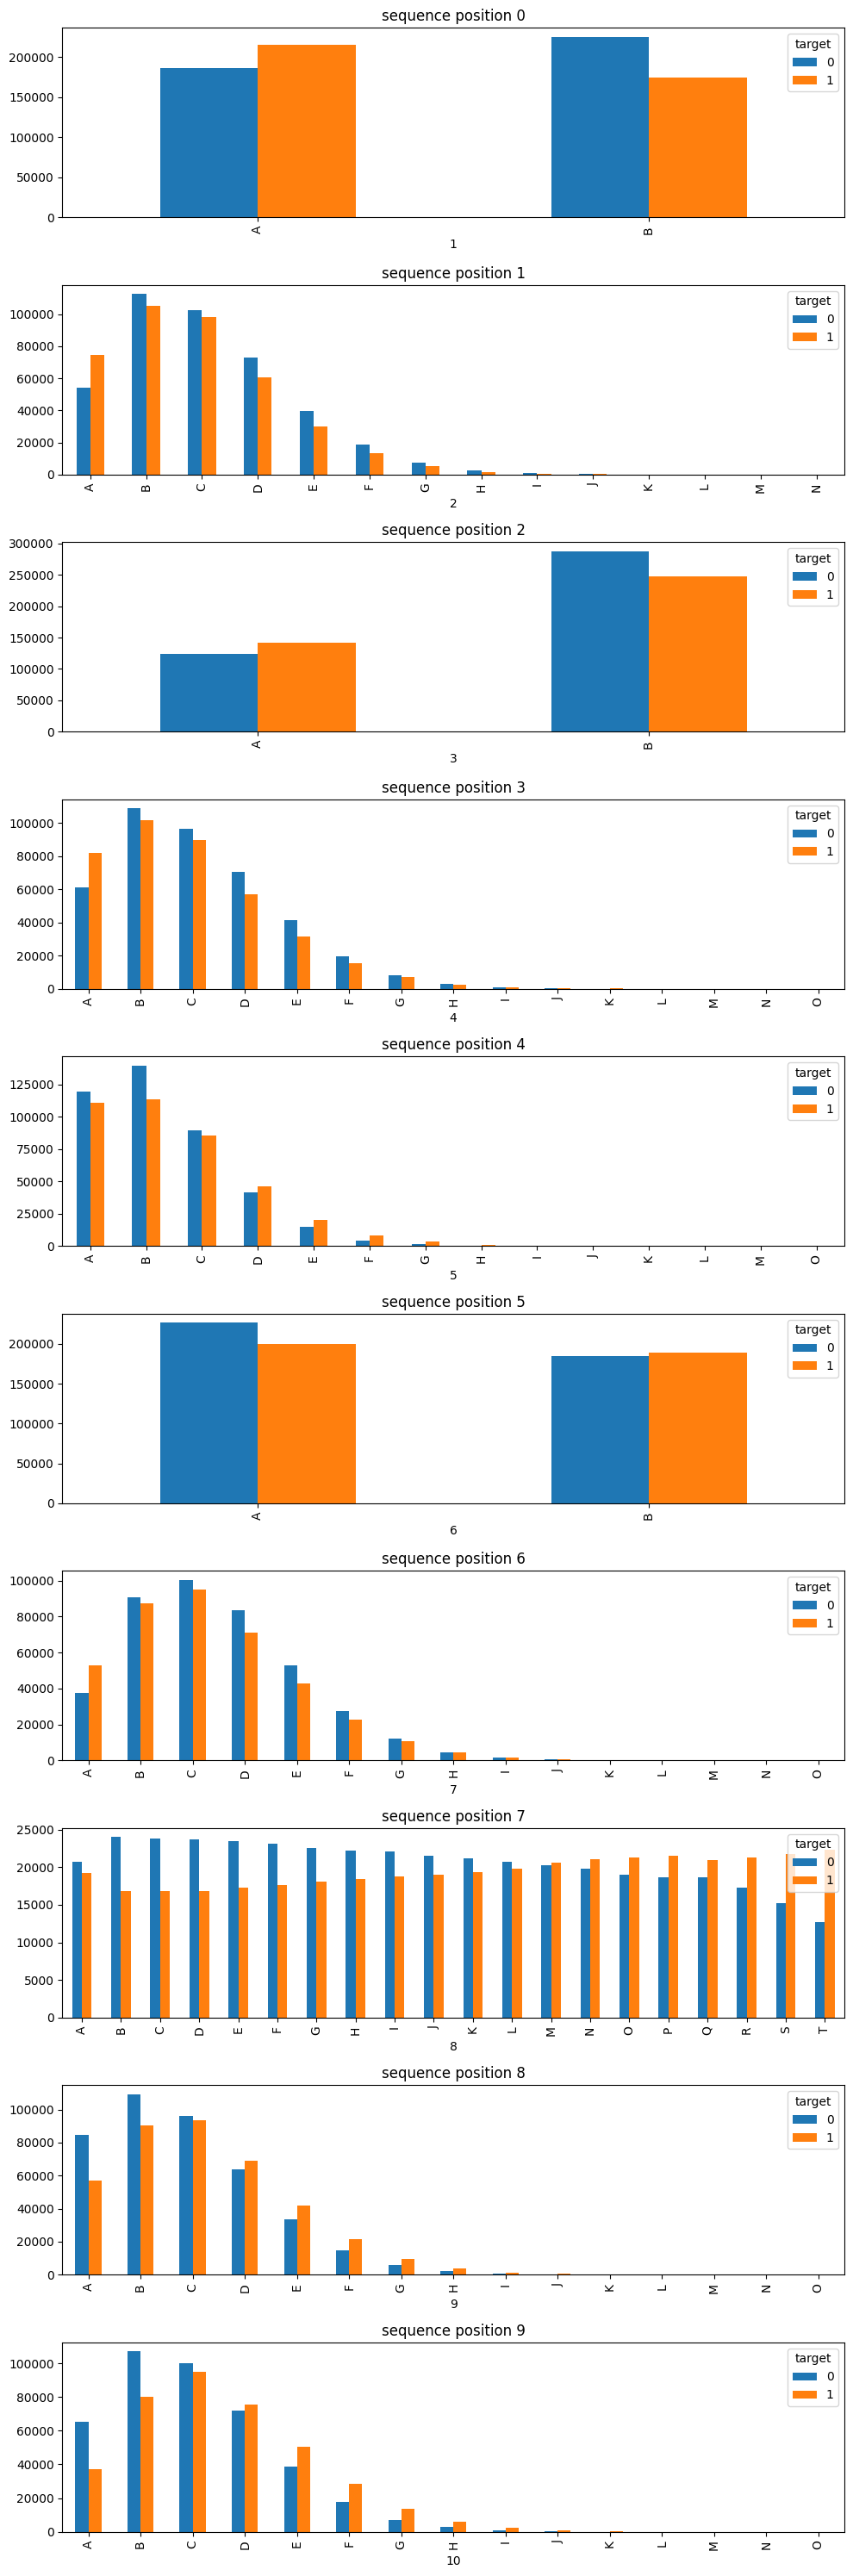

In [15]:
fig, axs = plt.subplots(10, figsize=(10,30))
for i in range(10):
    target_seqpos_counts = f27_split[['target', i+1]].groupby(['target', i+1]).size().unstack(fill_value=0).T
    target_seqpos_counts.plot(kind='bar', ax=axs[i], title=f'sequence position {i}')
fig.tight_layout()


In [16]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
f27_encoded = enc.fit_transform(f27_split.drop(['target'], axis=1)).astype(int)
f27_encoded_test = enc.transform(f27_split_test).astype(int)
f27_encoded[:3]


array([[0, 2, 1, 0, 3, 0, 1, 4, 2, 1],
       [1, 1, 1, 2, 0, 0, 0, 5, 3, 4],
       [1, 3, 0, 4, 0, 0, 1, 8, 2, 3]])

In [17]:
f27_split.drop(['target'], axis=1).head(3)


,1,2,3,4,5,6,7,8,9,10
0,A,C,B,A,D,A,B,E,C,B
1,B,B,B,C,A,A,A,F,D,E
2,B,D,A,E,A,A,B,I,C,D


In [18]:
f27_split_df = pd.DataFrame(f27_encoded)
f27_split_df.columns = [f'f_27_pos{i}' for i in range(10)]
f27_split_test_df = pd.DataFrame(f27_encoded_test)
f27_split_test_df.columns = [f'f_27_pos{i}' for i in range(10)]


In [19]:
full_df = pd.concat([train_df, f27_split_df], axis=1)
full_df["f_27_unique"] = full_df["f_27"].apply(lambda x: len(set(x)))

full_test_df = pd.concat([test_df, f27_split_test_df], axis=1)
full_test_df["f_27_unique"] = full_test_df["f_27"].apply(lambda x: len(set(x)))


In [20]:
# full_df = full_df.merge(f27_map, how='left', on='f_27')

# full_test_df = full_test_df.merge(f27_map, how='left', on='f_27').fillna(0)
# full_test_df[['f_27_tar0', 'f_27_tar1']] = full_test_df[['f_27_tar0', 'f_27_tar1']].astype(int)


In [21]:
# temp = full_test_df[[f'f_27_pos{i}' for i in range(10)] + ['f_27_unique'] + ['f_27_tar0', 'f_27_tar1']]
# temp


In [22]:
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=2)
# imputer.fit_transform(temp.to_numpy())
# full_test_df


In [23]:
X_train = full_df.drop(['id', 'target'], axis=1)
X_train['f_27'] = X_train['f_27'].astype('category')
y_train = train_df.target

X_test = full_test_df.drop(['id'], axis=1)
X_test['f_27'] = X_test['f_27'].astype('category')


In [24]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.layers.experimental import preprocessing
# from sklearn.model_selection import train_test_split, StratifiedKFold
# from sklearn.metrics import r2_score

# model = tf.keras.Sequential([
#     layers.LSTM(32, input_shape=X_shape, return_sequences=True),
#     layers.LSTM(32, input_shape=(X_shape[0], 32), return_sequences=False),
#     layers.Dense(32, activation='relu', input_shape=X_shape),
#     layers.Dense(16, activation='relu'),
#     layers.Dense(1, activation='sigmoid')
# ])

# lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(0.3, decay_steps=200, decay_rate=0.85, staircase=False)
# model.summary()
# model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
#               metrics=['accuracy', tf.keras.metrics.AUC()], 
#               optimizer=tf.keras.optimizers.Adam(lr_schedule))


In [25]:
# Xt, Xv, yt, yv = train_test_split(X_train, y_train, test_size=0.3)
# bs = len(Xt) // 500
# bs


In [26]:
# history = model.fit(Xt, yt, batch_size=bs, validation_data=(Xv, yv), verbose=1, epochs=10)


In [27]:
# model.predict(Xv[:10])


In [28]:
import lightgbm as lgb

train_data = lgb.Dataset(X_train, label=y_train)
param = {'objective': 'cross_entropy', 'metric': ['auc', 'binary_logloss']}
# num_round = 100
# hist = lgb.cv(param, train_data, num_round, nfold=5)


In [29]:
# hist['auc-mean'][-1]


In [30]:
clf = lgb.train(param, train_data)


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] [cross_entropy:Init]: (objective) labels passed interval [0, 1] check
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5067
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 42
[LightGBM] [Info] [cross_entropy:BoostFromScore]: pavg = 0.486140 -> initscore = -0.055454
[LightGBM] [Info] Start training from score -0.055454


In [31]:
y_pred = clf.predict(X_test)


In [32]:
submission = test_df[['id']]
submission['target'] = y_pred
submission.to_csv('submission.csv', index=False)


/tmp/ipykernel_8/4272349167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['target'] = y_pred


In [33]:
pd.read_csv('submission.csv')


,id,target
0,800000,0.870482
1,800001,0.427691
2,800002,0.619848
3,800003,0.795102
4,800004,0.605826
...,...,...
99995,899995,0.075031
99996,899996,0.920449
99997,899997,0.229171
99998,899998,0.930917
